# Neural network toolkit demo

## Smoothing modules

Smoothing modules in `unipercept.nn.smooth` can be used to apply smoothing through an input signal.

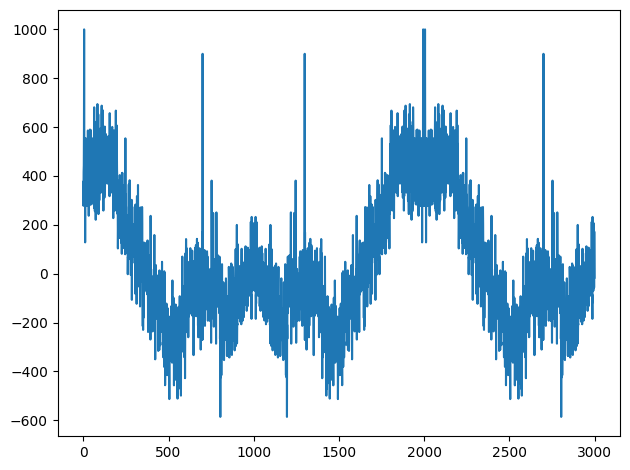

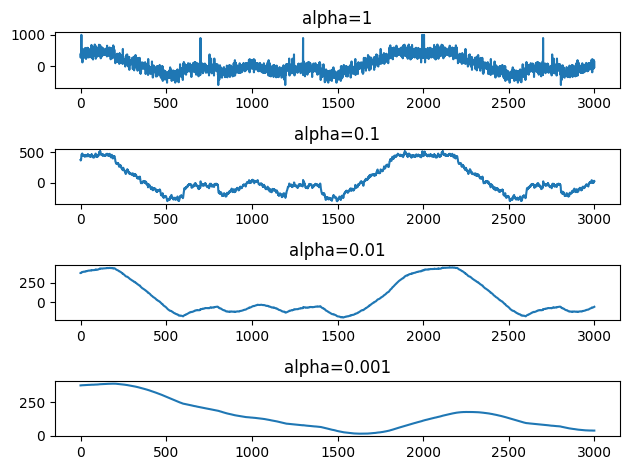

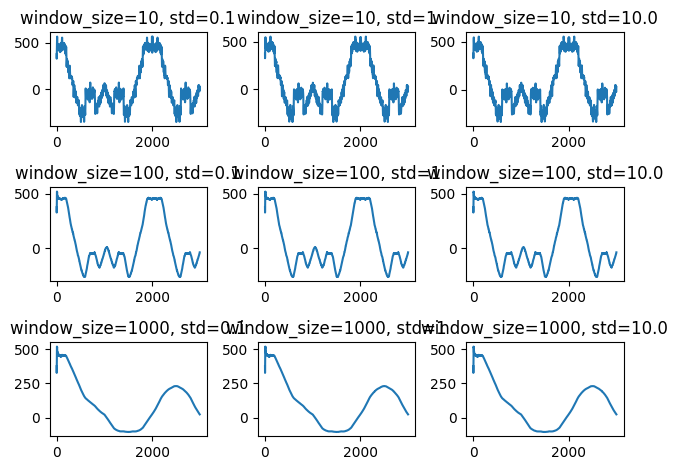

In [18]:
import matplotlib.pyplot as plt
import torch
import unipercept as up

N = 1000
samples = torch.rand(N) + torch.randn(N)
samples += 4 * torch.cos(torch.linspace(0, 1.5 * 3.14, N))
samples[100:200] += 1
samples[600:800] += 2
samples[5] = 10
samples[700] = 8
samples[500:900] += torch.sin(torch.linspace(0, 3.14, 400))
samples *= 100

samples = torch.cat([samples, samples.flip(0), samples])


# Source signal
fig, axs = plt.subplots(1, 1, squeeze=False)
axs[0, 0].plot(samples)
fig.tight_layout()
fig.show()

# EMA
fig, axs = plt.subplots(4, 1, squeeze=False)
for x, alpha in enumerate((1, 1e-1, 1e-2, 1e-3)):
    ema = up.nn.smooth.EMA(alpha)
    ema_obs = []
    for s in samples:
        ema_obs.append(ema(s))
    ax = axs[x, 0]
    ax.plot(torch.stack(ema_obs))
    ax.set_title(f"alpha={alpha}")
fig.tight_layout()
fig.show()

# GMA
fig, axs = plt.subplots(3, 3, squeeze=False)
for x, window_size in enumerate((10, 100, 1000)):
    for y, std in enumerate((1e-1, 1, 1e1)):
        gma = up.nn.smooth.GMA(window_size, std)
        gma_obs = []
        for s in samples:
            gma_obs.append(gma(s))
        ax = axs[x, y]
        ax.plot(torch.stack(gma_obs))
        ax.set_title(f"window_size={window_size}, std={std}")
fig.tight_layout()
fig.show()